# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [2]:
df = pd.read_csv('data/grades.csv')

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [5]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [6]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

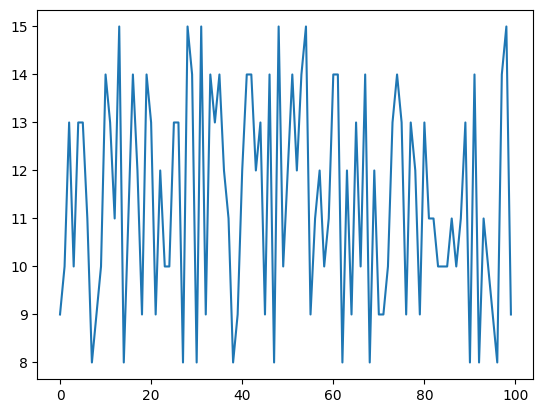

In [7]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

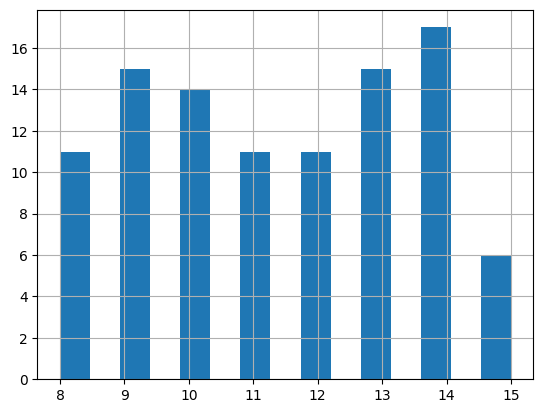

In [8]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [9]:
df.國文.mean()

11.39

算標準差。

In [10]:
df.國文.std()

2.196852661459484

不如就該算的都幫我們算算...

In [11]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [12]:
df.corr()

ValueError: could not convert string to float: '劉俊安'

只算兩科間的相關係數當然也可以。

In [ ]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [ ]:
df['total'] = df.sum(ndim=2)
df.head()

TypeError: sum() got an unexpected keyword argument 'ndim'

### 【技巧】

有計算的當然也可以的。

In [ ]:
df['加權'] = df.國文+df.英文+df.數學*2

In [ ]:
df.head()

,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,49
1,胡玉華,10,10,10,8,9,40
2,黃淑婷,13,15,8,11,14,44
3,陳上紫,10,10,8,9,14,36
4,崔靜成,13,12,14,12,13,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [ ]:
df.sort_values(by='加權',ascending=False).head()

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
83,李士賢,10,14,15,13,13,54


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [ ]:
df2 = df.sort_values(by=['加權','國文'],ascending=False).head()

### 【重點】重設 index

In [ ]:
df2.head()

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
36,詹威德,12,13,15,10,14,55
57,胡淳茜,12,15,14,13,11,55
25,蔡亦瑄,13,13,14,13,12,54
44,童心怡,13,13,14,8,13,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [ ]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
36,詹威德,12,13,15,10,14,55


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [ ]:
df2[(df2.數學==15) & (df2.英文==15)]

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [ ]:
df.drop('加權',axis=1)
df

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
36,詹威德,12,13,15,10,14,55
57,胡淳茜,12,15,14,13,11,55
25,蔡亦瑄,13,13,14,13,12,54
44,童心怡,13,13,14,8,13,54


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [ ]:
df2.drop('加權',axis=1)
df2

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
36,詹威德,12,13,15,10,14,55
57,胡淳茜,12,15,14,13,11,55
25,蔡亦瑄,13,13,14,13,12,54
44,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [ ]:
df2.drop(4).head()

KeyError: '[4] not found in axis'

In [ ]:
df2

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
36,詹威德,12,13,15,10,14,55
57,胡淳茜,12,15,14,13,11,55
25,蔡亦瑄,13,13,14,13,12,54
44,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [ ]:
df2[df2.姓名==吳志遠].index()

NameError: name '李文賢' is not defined

In [ ]:
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [15]:
import pandas_datareader as pdr
#df = pdr.get_data_yahoo('AAPL')

In [17]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
df = pd.read_csv('data/aapl.csv', index_col="Date")

In [18]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,26.986492,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800


#### 只要最後 300 個交易日!

In [20]:
df = df[-300:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,112.709999,113.050003,112.279999,112.519997,110.173546,21701800
2016-10-04,113.059998,114.309998,112.629997,113.000000,110.643539,29736800
2016-10-05,113.400002,113.660004,112.690002,113.050003,110.692505,21453100
2016-10-06,113.699997,114.339996,113.129997,113.889999,111.514984,28779300
2016-10-07,114.309998,114.559998,113.510002,114.059998,111.681435,24358400
...,...,...,...,...,...,...
2017-12-04,172.479996,172.619995,169.630005,169.800003,169.800003,32542400
2017-12-05,169.059998,171.520004,168.399994,169.639999,169.639999,27350200
2017-12-06,167.500000,170.199997,166.460007,169.009995,169.009995,28560000


#### 20 日的移動平均

<Axes: xlabel='Date'>

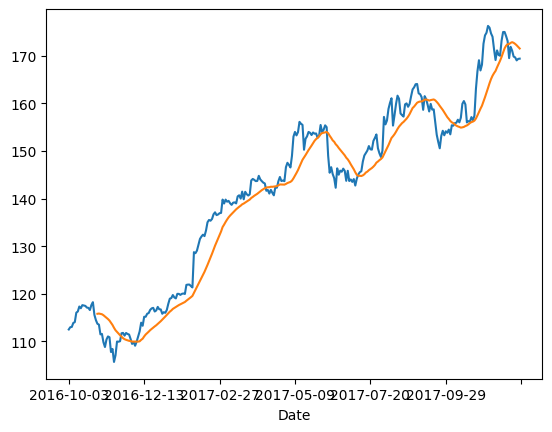

In [21]:
df.Close.plot()
df.Close.rolling(20).mean().plot()

<Axes: xlabel='Date'>

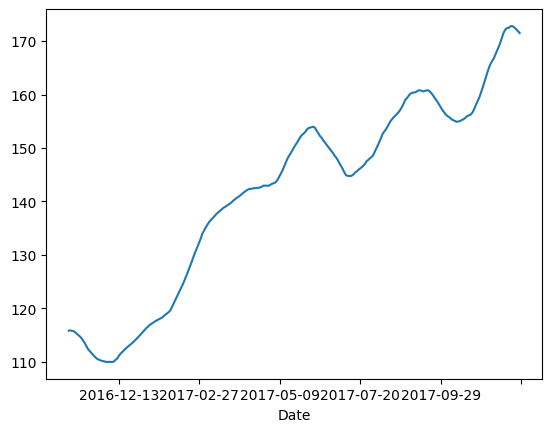

In [22]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

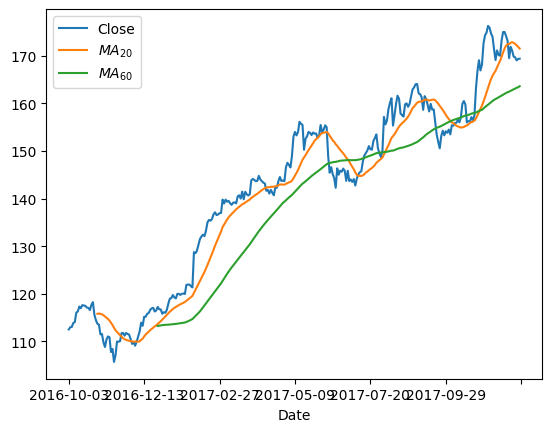

In [23]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [24]:
close = df.Close.values
len(close)

300

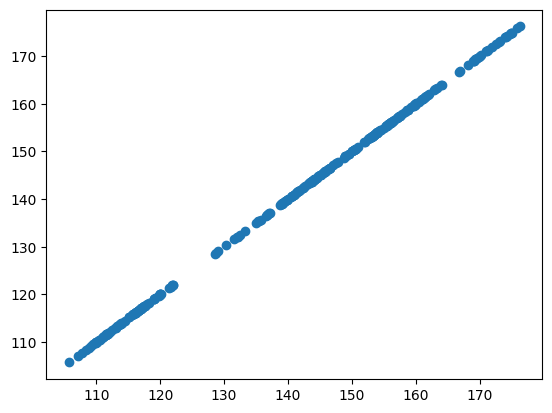

In [26]:
x = close[:-1]
len(x)

y = close[:-1]
len(y)

import matplotlib.pyplot as plt
plt.scatter(x,y)

299

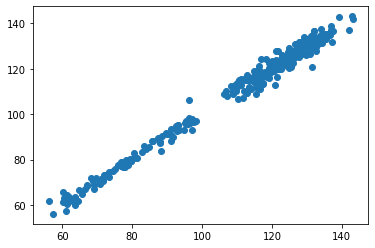

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [27]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

mydata = np.random.randn(4,3)

In [28]:
mydata

array([[ 0.25741268, -1.126464  , -0.81379599],
       [-0.32606816, -0.64779565, -0.27086879],
       [ 1.69427847, -1.06177744,  0.34171609],
       [ 0.69122381, -1.41580555, -0.93214887]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [29]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [30]:
df2

,A,B,C
0,0.257413,-1.126464,-0.813796
1,-0.326068,-0.647796,-0.270869
2,1.694278,-1.061777,0.341716
3,0.691224,-1.415806,-0.932149


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [31]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [32]:
df3

,A,B,C
0,0.320995,-0.102189,0.529737
1,-0.079610,0.483959,-0.653030
2,0.836303,0.138705,-2.363455


In [33]:
df4 = pd.concat([df2,df3],axis=0)

In [34]:
df4

,A,B,C
0,0.257413,-1.126464,-0.813796
1,-0.326068,-0.647796,-0.270869
2,1.694278,-1.061777,0.341716
3,0.691224,-1.415806,-0.932149
0,0.320995,-0.102189,0.529737
1,-0.079610,0.483959,-0.653030
2,0.836303,0.138705,-2.363455


前面我們弄得亂七八糟的 index 重設一下。

In [35]:
df4.index = range(7)

In [36]:
df4

,A,B,C
0,0.257413,-1.126464,-0.813796
1,-0.326068,-0.647796,-0.270869
2,1.694278,-1.061777,0.341716
3,0.691224,-1.415806,-0.932149
4,0.320995,-0.102189,0.529737
5,-0.079610,0.483959,-0.653030
6,0.836303,0.138705,-2.363455


#### 横向的貼

In [38]:
df5 = pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [39]:
df5

,A,B,C,A,B,C
0,0.257413,-1.126464,-0.813796,0.320995,-0.102189,0.529737
1,-0.326068,-0.647796,-0.270869,-0.079610,0.483959,-0.653030
2,1.694278,-1.061777,0.341716,0.836303,0.138705,-2.363455
3,0.691224,-1.415806,-0.932149,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [40]:
df_names = pd.read_csv('data/names.csv',names = ['姓名'])

In [41]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [42]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [50]:
df_grades.to_csv('data/grades2.csv',index=0)

In [48]:
df_grades

,國文,英文,數學,社會,自然
0,10,7,10,11,6
1,8,7,6,7,8
2,14,6,6,15,7
3,11,6,6,10,8
4,13,13,6,10,13
...,...,...,...,...,...
95,9,6,13,9,7
96,14,9,9,10,15
97,12,14,11,9,12
98,7,14,11,15,13


In [52]:
df_score = pd.concat([df_names,df_grades],axis=1)

In [ ]:
df_names = pd.read_csv('data/grades2.csv')

,姓名,Unnamed: 0,國文,英文,數學,社會,自然
0,羅雅慧,0,12,6,6,8,12
1,王紹尹,1,10,6,13,13,6
2,黃季坤,2,11,14,13,13,11
3,許正書,3,10,13,13,14,12
4,張鈞蓮,4,8,13,14,9,13
...,...,...,...,...,...,...,...
95,陳君生,95,11,9,13,14,10
96,曾桂甫,96,14,9,12,11,9
97,林欣怡,97,15,8,13,14,14
98,林佳霖,98,8,11,9,7,10
